### import numpy as np        

In [4]:
# This function reorders rows of matrix
# such that its non-zero elements moved to the top
def reorder_rows(A,by_row):
    assert by_row < A.shape[0], "Incorrect call" 
    A[by_row:,by_row:] = A[by_row:,by_row:][np.argsort(np.abs(A[by_row:,by_row:][:, 1]))]
    return A   

In [5]:
def Gauss(A, b, is_simple = False):
    A_comp = np.hstack([A.astype('float64'),b.astype('float64')]) # General matrix
    for i in range(A_comp.shape[0]-1):
        if not is_simple:
            A_comp = reorder_rows(A_comp, i) #With main element implementation
        for j in range(i+1,A_comp.shape[0]):
            coef = A_comp[j][i] / A_comp[i][i] # Non - zero diagonal element (guaranteed)
            A_comp[j,:] -= coef*A_comp[i, :]
    # Backprop
    for i in range(A_comp.shape[0]-1, 0,-1):
        for j in range(i - 1, -1,-1):
            coef = A_comp[j][i] / A_comp[i][i]
            A_comp[j,:] -= coef*A_comp[i,:]
    det = 1
    for i in range(A_comp.shape[0]):
        det *= A_comp[i][i]
    for i in range(A_comp.shape[0]):
        A_comp[i,:] *= 1 / A_comp[i][i]
    
    return A_comp[:,-1], det
    
def get_inv(A):
    E = np.eye(A.shape[0])
    A_inv = Gauss(A,E[:,0].reshape(-1,1))[0].reshape(-1,1)
    for i in range(1,A.shape[0]) :
        A_inv = np.hstack([A_inv,Gauss(A, E[:,i].reshape(-1,1))[0].reshape(-1,1)])
    return A_inv

#####  Функция для записи матриц системы уравнений с клавиатуры

In [79]:
def get_from_keyboard(n, m):
    A = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            A[i][j] = float(input())
    print("Теперь правую часть сиситемы уравнений\n")
    b = np.zeros(n);
    for i in range(n):
        b[i] = float(input())
    b = b.reshape(-1,1)
    return A, b

### Вариант 9

<img src = "task.png">

In [163]:
A1 = np.array([
    [2,-5,3,1],
    [3,-7,3,-1],
    [5,-9,6,2],
    [4,-6,3,1]
])
b1 = np.array([5, -1, 7, 8]).reshape(-1,1)
A2 = np.array([
    [4,3,-9,1],
    [2,5,-8,-1],
    [2,16,-14,2],
    [2,3,-5,-11]
])
b2 = np.array([9, 8, 24, 7]).reshape(-1,1)
A3 = np.array([
    [12,14,-15,24],
    [16, 18, -22, 29],
    [18,20,-21,32],
    [10,12,-16,20]
])
b3 = np.array([5,8,9,4]).reshape(-1,1)


#### Сравним ответы

In [27]:
answ = Gauss(A1,b1)
print("Ответы: ", answ[0])
print("det(A):", answ[1])
print("Верный ответ : ", np.linalg.inv(A1).dot(b1).reshape(1,-1))
print("Верный определитель: ",np.linalg.det(A1))
print("Обратная матрица:", get_inv(A1))
print("Верный ответ : ", np.linalg.inv(A1))
print("Число обусловленности матрицы: ", np.linalg.norm(A1)*np.linalg.norm(get_inv(A1)))


Ответы:  [ 0.         -3.         -5.33333333  6.        ]
det(A): 18.0
Верный ответ :  [[-1.33226763e-15 -3.00000000e+00 -5.33333333e+00  6.00000000e+00]]
Верный определитель:  18.000000000000014
Обратная матрица: [[-1.          0.          0.33333333  0.33333333]
 [-1.          0.          0.66666667 -0.33333333]
 [-1.          0.16666667  1.05555556 -0.94444444]
 [ 1.         -0.5        -0.5         0.5       ]]
Верный ответ :  [[-1.          0.          0.33333333  0.33333333]
 [-1.         -0.          0.66666667 -0.33333333]
 [-1.          0.16666667  1.05555556 -0.94444444]
 [ 1.         -0.5        -0.5         0.5       ]]
Число обусловленности матрицы:  48.80516821448774


##### Верно

In [28]:
answ = Gauss(A2,b2)
print("Ответы: ", answ[0])
print("det(A):", answ[1])
print("Верный ответ : ", np.linalg.inv(A2).dot(b2).reshape(1,-1))
print("Верный определитель: ",np.linalg.det(A2))
print("Обратная матрица:", get_inv(A2))
print("Верный ответ : ", np.linalg.inv(A2))
print("Число обусловленности матрицы: ", np.linalg.norm(A2)*np.linalg.norm(get_inv(A2)))

Ответы:  [3.00000000e+00 2.00000000e+00 1.00000000e+00 7.16272919e-17]
det(A): -867.9999999999995
Верный ответ :  [[3. 2. 1. 0.]]
Верный определитель:  -867.9999999999995
Обратная матрица: [[ 0.68894009 -1.3640553   0.25345622  0.23271889]
 [ 0.11751152 -0.50691244  0.18202765  0.08986175]
 [ 0.23963134 -0.77880184  0.17511521  0.12442396]
 [ 0.0483871  -0.03225806  0.01612903 -0.08064516]]
Верный ответ :  [[ 0.68894009 -1.3640553   0.25345622  0.23271889]
 [ 0.11751152 -0.50691244  0.18202765  0.08986175]
 [ 0.23963134 -0.77880184  0.17511521  0.12442396]
 [ 0.0483871  -0.03225806  0.01612903 -0.08064516]]
Число обусловленности матрицы:  53.46443604446612


##### Верно

In [29]:
answ = Gauss(A3,b3)
print("Ответы: ", answ[0])
print("det(A):", answ[1])
print("Верный ответ : ", np.linalg.inv(A3).dot(b3).reshape(1,-1))
print("Верный определитель: ",np.linalg.det(A3))
print("Обратная матрица:", get_inv(A3))
print("Верный ответ : ", np.linalg.inv(A3))
print("Число обусловленности матрицы: ", np.linalg.norm(A3)*np.linalg.norm(get_inv(A3)))

Ответы:  [ 2.22222222e+00 -1.66666667e+00 -1.11111111e-01 -5.55111512e-17]
det(A): -36.00000000000019
Верный ответ :  [[ 2.22222222e+00 -1.66666667e+00 -1.11111111e-01  1.77635684e-15]]
Верный определитель:  36.000000000000256
Обратная матрица: [[ 1.00000000e+00  2.88888889e+00 -1.66666667e+00 -2.72222222e+00]
 [-2.50000000e+00 -4.66666667e+00  3.50000000e+00  4.16666667e+00]
 [ 2.07241631e-15 -4.44444444e-01  3.33333333e-01  1.11111111e-01]
 [ 1.00000000e+00  1.00000000e+00 -1.00000000e+00 -1.00000000e+00]]
Верный ответ :  [[ 1.00000000e+00  2.88888889e+00 -1.66666667e+00 -2.72222222e+00]
 [-2.50000000e+00 -4.66666667e+00  3.50000000e+00  4.16666667e+00]
 [ 1.77635684e-15 -4.44444444e-01  3.33333333e-01  1.11111111e-01]
 [ 1.00000000e+00  1.00000000e+00 -1.00000000e+00 -1.00000000e+00]]
Число обусловленности матрицы:  707.0817701154682


#####  Верно

In [30]:
B = np.array([
    [1,4,5],
    [0,9,1],
    [0,5,5]
])
b = np.array([1,2,3]).reshape(-1,1) 

In [31]:
answ = Gauss(B,b)
print("Ответы: ", answ[0])
print("det(A):", answ[1])
print("Верный ответ : ", np.linalg.inv(B).dot(b).reshape(1,-1))
print("Верный определитель: ",np.linalg.det(B))
print("Обратная матрица:", get_inv(B))
print("Верный ответ : ", np.linalg.inv(B))
print("Число обусловленности матрицы: ", np.linalg.norm(B)*np.linalg.norm(get_inv(B)))

Ответы:  [-1.825  0.175  0.425]
det(A): 40.0
Верный ответ :  [[-1.825  0.175  0.425]]
Верный определитель:  40.000000000000014
Обратная матрица: [[ 1.     0.125 -1.025]
 [ 0.     0.125 -0.025]
 [ 0.    -0.125  0.225]]
Верный ответ :  [[ 1.     0.125 -1.025]
 [ 0.     0.125 -0.025]
 [ 0.    -0.125  0.225]]
Число обусловленности матрицы:  19.336041476993167


##### Верно

In [92]:
B = np.array([
    [1,4,5],
    [0,7,1],
    [0,7,5]
])
b = np.array([1,2,3]).reshape(-1,1) 

In [33]:
answ = Gauss(B,b)
print("Ответы: ", answ[0])
print("det(A):", answ[1])
print("Верный ответ : ", np.linalg.inv(B).dot(b).reshape(1,-1))
print("Верный определитель: ",np.linalg.det(B))
print("Обратная матрица:", get_inv(B))
print("Верный ответ : ", np.linalg.inv(B))
print("Число обусловленности матрицы: ", np.linalg.norm(B)*np.linalg.norm(get_inv(B)))


Ответы:  [-1.25  0.25  0.25]
det(A): 28.0
Верный ответ :  [[-1.25  0.25  0.25]]
Верный определитель:  27.999999999999996
Обратная матрица: [[ 1.          0.53571429 -1.10714286]
 [ 0.          0.17857143 -0.03571429]
 [ 0.         -0.25        0.25      ]]
Верный ответ :  [[ 1.          0.53571429 -1.10714286]
 [ 0.          0.17857143 -0.03571429]
 [ 0.         -0.25        0.25      ]]
Число обусловленности матрицы:  21.056411113473064


#####  Верно

# Сгенерируем матрицу согласно варианту и исследуем устойчивость метода Гаусса

<h2> Используется вариант 2</h2>
<img src = "task2.png">

In [177]:
def generate_matrixes(size):
    A = np.zeros((size,size), dtype = 'float32')
    for i in range(size):
        # According to my homework
        m = 8
        n = 20
        
        for j in range(size):
            if i == j:
                A[i][j] = n + m*m + float(j)/m + float(i)/n
            else:
                A[i][j] = (i+j)/(m+n)
    #filling right side
    b = np.array([])
    for i in range(size):
        b = np.append(b, 20 + 50*i)
    return A, b.reshape(-1,1)
    

In [35]:
A,b = generate_matrixes(20)

In [37]:
answ = Gauss(A,b)
print("Ответы: ", answ[0])
print("det(A):", answ[1])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Верный определитель: ",np.linalg.det(A))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

Ответы:  [-0.30866362  0.2448342   0.7969705   1.34775019  1.89717847  2.44526
  2.99199986  3.53740328  4.08147457  4.62421929  5.16564151  5.70574642
  6.24453937  6.78202407  7.31820645  7.85308998  8.38667999  8.91898193
  9.44999894  9.97973729]
det(A): 4.464076826452955e+38
Верный ответ :  [[-0.30866361  0.24483421  0.7969705   1.34775023  1.89717852  2.44526012
   2.99199978  3.53740322  4.08147457  4.62421927  5.16564145  5.70574621
   6.24453933  6.7820241   7.31820621  7.85308985  8.38668031  8.91898215
   9.44999928  9.97973694]]
Верный определитель:  inf
Число обусловленности матрицы:  20.053848472804876


##### Исследуем вычислительную устойчивость алгоритма

##### Сгенерируем диагональную матрицу с небольшими  собственными значениями

In [51]:
D = np.diag([np.random.normal(0.001,0.1) for i in range(50)])

##### Сгенерируем случайную (невырожденную) матрицу того же размера

In [55]:
R = np.random.rand(50,50)

##### Сделаем переход в диагональной матрице к другому базису, чтобы получить матрицу с теми же собственными значениями, но не диагональную

In [65]:
M = np.linalg.inv(R).dot(D).dot(R)

In [67]:
np.linalg.norm(M)*np.linalg.norm(get_inv(M))

216078.77062024968

##### Видно, что она достаточно плохо обусловлена . Найдем решение с правой частью равной единицам.

In [70]:
x_0 = Gauss(M,np.ones((50,1)))

#####  "Возмутим" правую часть 

In [71]:
x_1 = Gauss(M,np.ones((50,1))+0.01)

#####  Полученная относительная "погрешность" :

In [76]:
np.linalg.norm(x_1[0] - x_0[0]).sum()/0.01

98224.26434921645

##### Таким образом, метод Гаусса не является вычислительно устойчивым

In [318]:
def SeidelGauss_step(x_0, A, b): # Для удобства реализации метода верхней релаксации 
    x_new = np.zeros_like(x_0) # используем метод Гаусса - Зейделя
    for i in range(A.shape[0]):
        s1 = np.dot(A[i, :i], x_new[:i])
        s2 = np.dot(A[i, i + 1 :], x_0[i + 1 :])
        x_new[i] = (b[i] - s1 - s2) / A[i, i]
    return x_new
def relaxation_step(x_0, A, b, w): # Получить следующее приближение
    z = SeidelGauss_step(x_0, A, b)
    x_new = (1-w)*x_0 + w*z
    return x_new
def RelaxationSolve(A, b, w, x_0 = None, max_iterations = 1000, tol = 10e-6):
    if not x_0 is None: # Если начальноеп риближение не задано, то
        x = x_0 # В качестве начального приближения используем нули
    else:
        x = np.zeros_like(A[0,:])
    for i in range(max_iterations):
        x_neu = relaxation_step(x, A, b, w)
        if np.allclose(x_neu, x, rtol =tol): # Если достигнута сходимость с нужной точностью, то ответ готов
            return x_neu, i
        x = x_neu
    return x_neu, max_iterations

#####  Теперь проверим работу алгоритма

In [221]:
A,b = generate_matrixes(3)

In [222]:
answ = RelaxationSolve(A,b.reshape(1,-1)[0],1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

(3,)
Ответы:  [0.23653398 0.8296917  1.4213904 ]
Верный ответ :  [[0.23653381 0.82969121 1.42138961]]
Число обусловленности матрицы:  3.000027453443578


In [223]:
A,b = generate_matrixes(5)
answ = RelaxationSolve(A,b.reshape(1,-1)[0],1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

(5,)
Ответы:  [0.22959982 0.8208305  1.4106067  1.9989339  2.5858176 ]
Верный ответ :  [[0.22959944 0.82082977 1.41060585 1.99893273 2.58581619]]
Число обусловленности матрицы:  5.000221043908256


In [224]:
A,b = generate_matrixes(10)
answ = RelaxationSolve(A,b.reshape(1,-1)[0],1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

(10,)
Ответы:  [0.16487855 0.74742115 1.3285308  1.9082124  2.4864721  3.0633144
 3.638744   4.2127676  4.785389   5.356614  ]
Верный ответ :  [[0.16487839 0.74742091 1.32853054 1.90821234 2.48647173 3.06331396
  3.63874387 4.21276709 4.78538879 5.35661401]]
Число обусловленности матрицы:  10.003643991588758


In [225]:
A,b = generate_matrixes(15)
answ = RelaxationSolve(A,b.reshape(1,-1)[0],1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

(15,)
Ответы:  [-4.4894749e-03  5.6492823e-01  1.1329453e+00  1.6995668e+00
  2.2647982e+00  2.8286438e+00  3.3911092e+00  3.9521995e+00
  4.5119200e+00  5.0702748e+00  5.6272702e+00  6.1829100e+00
  6.7371998e+00  7.2901430e+00  7.8417478e+00]
Верный ответ :  [[-4.48946868e-03  5.64928268e-01  1.13294537e+00  1.69956674e+00
   2.26479782e+00  2.82864364e+00  3.39110891e+00  3.95219949e+00
   4.51191951e+00  5.07027494e+00  5.62726953e+00  6.18290947e+00
   6.73719916e+00  7.29014344e+00  7.84174769e+00]]
Число обусловленности матрицы:  15.017967752210792


In [226]:
A,b = generate_matrixes(20)
answ = RelaxationSolve(A,b.reshape(1,-1)[0],1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

(20,)
Ответы:  [-0.3086635   0.24483438  0.7969707   1.3477504   1.8971789   2.4452603
  2.992       3.5374036   4.0814753   4.62422     5.165642    5.7057467
  6.2445393   6.782024    7.318207    7.85309     8.386681    8.918982
  9.45        9.979737  ]
Верный ответ :  [[-0.30866361  0.24483421  0.7969705   1.34775023  1.89717852  2.44526012
   2.99199978  3.53740322  4.08147457  4.62421927  5.16564145  5.70574621
   6.24453933  6.7820241   7.31820621  7.85308985  8.38668031  8.91898215
   9.44999928  9.97973694]]
Число обусловленности матрицы:  20.053848472804876


#####  Ответы верны

In [290]:
A = np.array([
    [4,3,-9,1],
    [2,5,-8,-1],
    [2,16,-14,2],
    [2,3,-5,-11]
])
b = np.array([9,8,24,7])
A = A.T.dot(A)
b = A.T.dot(b).reshape(1,-1)[0]

In [319]:
answ = RelaxationSolve(A,b,1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

Ответы:  [ 4.98135742 -1.02451022  6.96922197  8.02354272]
Верный ответ :  [[ 5. -1.  7.  8.]]
Число обусловленности матрицы:  2047.4987671252193


In [312]:
A = np.array([
    [2,-5,3,1],
    [3,-7,3,-1],
    [5,-9,6,2],
    [4,-6,3,1]
])
b = np.array([5,-1,7,8])
A = A.T.dot(A)
b = A.T.dot(b).reshape(1,-1)[0]

In [410]:
answ = RelaxationSolve(A,b,0.5, tol = 0.0002)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

Ответы:  [0.16490342 0.7474326  1.3285282  1.9081949  2.4864378  3.063261
 3.638669   4.2126675  4.785259   5.356449  ]
Верный ответ :  [[0.16487839 0.74742091 1.32853054 1.90821234 2.48647173 3.06331396
  3.63874387 4.21276709 4.78538879 5.35661401]]
Число обусловленности матрицы:  10.003643991588758


#####  Исследуем зависимость скорости ( количества итераций для достижения требуемой точности) от параметра w

In [420]:
w_s = np.linspace(0.05, 2, 500)
iterations_req = []
for i in w_s:
    answ = RelaxationSolve(A,b,i, tol = 0.0002)
    iterations_req.append(answ[1])

Text(0, 0.5, 'Iterations')

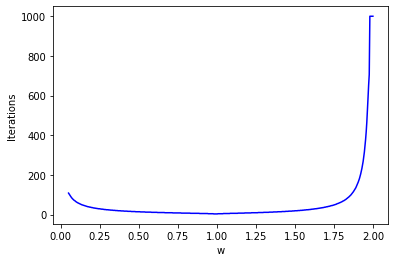

In [421]:
import matplotlib.pyplot as plt
plt.plot(w_s, iterations_req, color = 'blue')
plt.xlabel("w")
plt.ylabel("Iterations")

In [422]:
A,b = generate_matrixes(20)
answ = RelaxationSolve(A,b.reshape(1,-1)[0],1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

Ответы:  [-0.3086635   0.24483438  0.7969707   1.3477504   1.8971789   2.4452603
  2.992       3.5374036   4.0814753   4.62422     5.165642    5.7057467
  6.2445393   6.782024    7.318207    7.85309     8.386681    8.918982
  9.45        9.979737  ]
Верный ответ :  [[-0.30866361  0.24483421  0.7969705   1.34775023  1.89717852  2.44526012
   2.99199978  3.53740322  4.08147457  4.62421927  5.16564145  5.70574621
   6.24453933  6.7820241   7.31820621  7.85308985  8.38668031  8.91898215
   9.44999928  9.97973694]]
Число обусловленности матрицы:  20.053848472804876


In [423]:
A,b = generate_matrixes(10)
answ = RelaxationSolve(A,b.reshape(1,-1)[0],1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

Ответы:  [0.16487855 0.74742115 1.3285308  1.9082124  2.4864721  3.0633144
 3.638744   4.2127676  4.785389   5.356614  ]
Верный ответ :  [[0.16487839 0.74742091 1.32853054 1.90821234 2.48647173 3.06331396
  3.63874387 4.21276709 4.78538879 5.35661401]]
Число обусловленности матрицы:  10.003643991588758


In [424]:
A,b = generate_matrixes(30)
answ = RelaxationSolve(A,b.reshape(1,-1)[0],1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

Ответы:  [-1.3536443  -0.8340562  -0.31574616  0.20129     0.71705735  1.2315608
  1.7448051   2.256794    2.7675333   3.2770267   3.7852788   4.292294
  4.798078    5.3026333   5.8059673   6.308081    6.808981    7.308671
  7.807156    8.30444     8.800527    9.295421    9.789127   10.28165
 10.772993   11.263159   11.752154   12.239984   12.726649   13.212158  ]
Верный ответ :  [[-1.35364401 -0.83405608 -0.31574632  0.20128994  0.71705759  1.23156106
   1.74480501  2.25679422  2.76753307  3.27702693  3.78527911  4.2922943
   4.7980785   5.30263383  5.80596737  6.30808146  6.80898104  7.3086717
   7.80715598  8.30444041  8.80052619  9.29541998  9.78912715 10.28164925
  10.77299216 11.26315844 11.7521541  12.23998447 12.72664914 13.21215819]]
Число обусловленности матрицы:  30.235775998222948


In [425]:
A,b = generate_matrixes(40)
answ = RelaxationSolve(A,b.reshape(1,-1)[0],1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

Ответы:  [-2.92758489e+00 -2.43726063e+00 -1.94814205e+00 -1.46022570e+00
 -9.73506272e-01 -4.87980276e-01 -3.64224520e-03  4.79511231e-01
  9.61485088e-01  1.44228363e+00  1.92191064e+00  2.40037084e+00
  2.87766862e+00  3.35380745e+00  3.82879257e+00  4.30262709e+00
  4.77531576e+00  5.24686384e+00  5.71727324e+00  6.18655014e+00
  6.65469599e+00  7.12171793e+00  7.58761787e+00  8.05240059e+00
  8.51607132e+00  8.97863197e+00  9.44008636e+00  9.90044117e+00
  1.03596983e+01  1.08178625e+01  1.12749357e+01  1.17309227e+01
  1.21858292e+01  1.26396580e+01  1.30924120e+01  1.35440969e+01
  1.39947147e+01  1.44442701e+01  1.48927641e+01  1.53402071e+01]
Верный ответ :  [[-2.92758472e+00 -2.43726024e+00 -1.94814225e+00 -1.46022568e+00
  -9.73506564e-01 -4.87980129e-01 -3.64241905e-03  4.79511216e-01
   9.61485292e-01  1.44228351e+00  1.92191090e+00  2.40037086e+00
   2.87766850e+00  3.35380773e+00  3.82879256e+00  4.30262694e+00
   4.77531588e+00  5.24686333e+00  5.71727278e+00  6.1865490

In [426]:
A,b = generate_matrixes(50)
answ = RelaxationSolve(A,b.reshape(1,-1)[0],1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

Ответы:  [-4.9293175  -4.4593368  -3.990513   -3.522841   -3.0563164  -2.5909355
 -2.1266932  -1.6635865  -1.2016102  -0.74076104 -0.28103423  0.17757374
  0.6350677   1.091452    1.5467273   2.0009024   2.4539802   2.9059618
  3.356854    3.8066585   4.255381    4.7030253   5.1495957   5.595093
  6.039525    6.482893    6.9252005   7.366456    7.8066587   8.2458105
  8.683919    9.120988    9.557021    9.99202    10.425989   10.8589325
 11.290852   11.721756   12.151643   12.580518   13.008385   13.435247
 13.861113   14.285976   14.709847   15.132731   15.554622   15.975536
 16.395464   16.81442   ]
Верный ответ :  [[-4.92931644 -4.4593362  -3.99051242 -3.52284016 -3.05631569 -2.59093451
  -2.12669262 -1.66358554 -1.20160952 -0.74076032 -0.28103363  0.17757491
   0.63506858  1.09145178  1.54672908  2.00090335  2.45398015  2.90596205
   3.35685363  3.80665947  4.25538215  4.70302572  5.14959556  5.59509401
   6.03952574  6.48289367  6.92520212  7.36645687  7.80665796  8.24581178
   8.

In [427]:
A,b = generate_matrixes(15)
answ = RelaxationSolve(A,b.reshape(1,-1)[0],1.2)
print("Ответы: ", answ[0])
print("Верный ответ : ", np.linalg.inv(A).dot(b).reshape(1,-1))
print("Число обусловленности матрицы: ", np.linalg.norm(A)*np.linalg.norm(get_inv(A)))

Ответы:  [-4.4894749e-03  5.6492823e-01  1.1329453e+00  1.6995668e+00
  2.2647982e+00  2.8286438e+00  3.3911092e+00  3.9521995e+00
  4.5119200e+00  5.0702748e+00  5.6272702e+00  6.1829100e+00
  6.7371998e+00  7.2901430e+00  7.8417478e+00]
Верный ответ :  [[-4.48946868e-03  5.64928268e-01  1.13294537e+00  1.69956674e+00
   2.26479782e+00  2.82864364e+00  3.39110891e+00  3.95219949e+00
   4.51191951e+00  5.07027494e+00  5.62726953e+00  6.18290947e+00
   6.73719916e+00  7.29014344e+00  7.84174769e+00]]
Число обусловленности матрицы:  15.017967752210792
